Enter the number of days to forecast :35


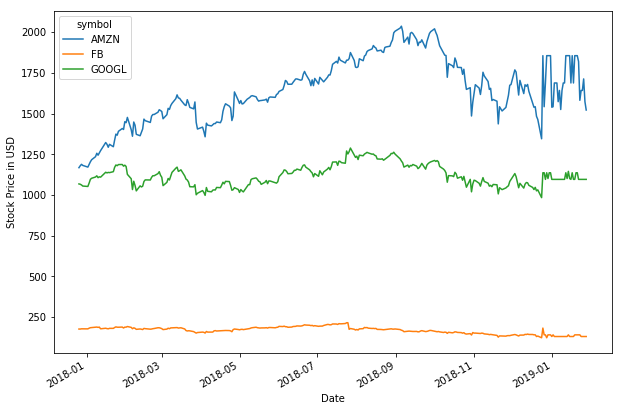

In [39]:
#Modules
from iexfinance import get_historical_data
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
from sklearn import preprocessing;
from sklearn import cross_validation;
from sklearn import linear_model;
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from statsmodels.tsa import holtwinters
from statsmodels.tsa import statespace
from statsmodels.tsa.api import Holt


#functions

#preparing data using normalisation techinque
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) #cross validation 
    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

#Adding predicted values to the dataframe
def adding_predicted(forecast,i):
    global df,dataframe
    df = df.filter(regex='date|open')
    df.reset_index(level=0, inplace=True)
    df['symbol'] = i
    for j in range(0,len(forecast)):
        df = df.append({"date":(datetime.now()+ timedelta(days=(j))).date(),"open":  forecast[j],"symbol":i}, ignore_index=True)
        dataframe = dataframe.append(df).drop_duplicates()  
    

        
                       
                       
if __name__ == '__main__':
        #initalizing required variables
        startdate = datetime.now() - timedelta(days=(7 * 52))
        forecast_col = 'open' #choosing which column to forecast
        forecast_out = int(input("Enter the number of days to forecast :")) #how far to forecast 
        test_size = 0.2; #the size of my test set
        dataframe = pd.DataFrame()
        
        #getting stock data from iex module for amazon,facebook and google
        for i in ["AMZN","FB","GOOGL"]:
            df = pd.DataFrame()
            df = get_historical_data(i, start=startdate, end=datetime.now(), output_format='pandas')
            #print(df.head(1))
            
            #preparing train,test datasets for validating the model
            X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
            
            '''Select which algorithm you want to use from below'''
            #learner = linear_model.LinearRegression() #initializing linear regression model
            #learner = KNeighborsRegressor(n_neighbors=3)
            learner = DecisionTreeRegressor(max_depth=5)
            #learner = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
            #learner = SVR(kernel='linear',degree=1)
            
            #training and predicting values for stocks
            learner.fit(X_train,Y_train); #training the  model
            score=learner.score(X_test,Y_test);#testing the  model
            forecast= learner.predict(X_lately); 
            adding_predicted(forecast,i)
        
        #ploting data from final dataset
        dataframe['date'] = pd.to_datetime(dataframe['date'])
        fig, ax = plt.subplots(figsize=(10,7))
        dataframe.groupby(['date','symbol']).sum()['open'].unstack().plot(ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price in USD')



Enter the number of days to forecast :30


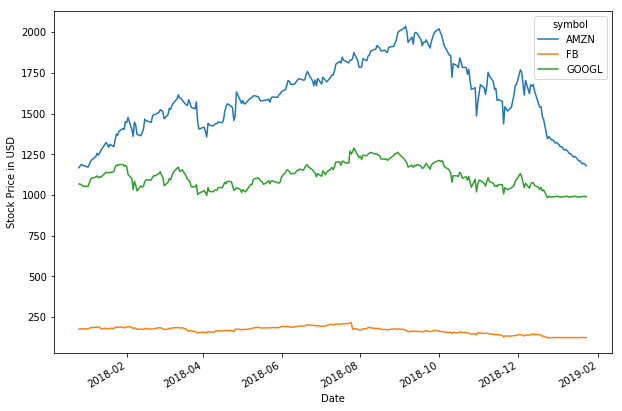

In [37]:
"""Time Series"""
if __name__ == '__main__':
        #initalizing required variables
        startdate = datetime.now() - timedelta(days=(7 * 52))
        forecast_col = 'open' #choosing which column to forecast
        forecast_out = int(input("Enter the number of days to forecast :")) #how far to forecast 
        test_size = 0.2; #the size of my test set
        dataframe = pd.DataFrame()
        
        #getting stock data from iex module for amazon,facebook and google
        for i in ["AMZN","FB","GOOGL"]:
            df = pd.DataFrame()
            df = get_historical_data(i, start=startdate, end=datetime.now(), output_format='pandas')
            
            '''Select which algorithm you want to use from below'''
            learner = tsa.holtwinters.ExponentialSmoothing(np.asarray(df[forecast_col]) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
            #learner = Holt(np.asarray(df.open)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)           
            forecast = learner.forecast(forecast_out)
            adding_predicted(forecast,i)
        
        #ploting data from final dataset
        dataframe['date'] = pd.to_datetime(dataframe['date'])
        fig, ax = plt.subplots(figsize=(10,7))
        dataframe.groupby(['date','symbol']).sum()[forecast_col].unstack().plot(ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price in USD')
